<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/news_nao_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recherche d'articles de News via une API
- Site https://newsapi.org/
- Mise à jour automatique dans l'URL de l'API de la date et du thème choisi : Karaté
- création d'un dataframe

In [ ]:
import requests
import math
import pandas as pd

df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey={API_KEY}"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
      
df


,source,author,title,description,url,urlToImage,publishedAt,content
0,POPSUGAR,Rey Katz,How Martial Arts Helped Me Accept My Nonbinary...,I was born in a nonbinary body. But because I ...,https://www.popsugar.com/fitness/martial-arts-...,https://media1.popsugar-assets.com/files/thumb...,2023-03-22T15:15:02Z,I was born in a nonbinary body. But because I ...
1,Natemat.pl,Daria Siemion,"Kim jest ks. Dominik Chmielewski, były karatek...",Ksiądz Dominik Chmielewski jest znany z czarne...,"https://natemat.pl/476891,kim-jest-ks-dominik-...",https://m.natemat.pl/0baf063ca3a038300ac1d186e...,2023-03-22T14:19:16Z,Chcesz czyta naTemat.pl bez reklam i personali...
2,Sputnikportal.rs,Sputnik Србија,Шпанија забранила каратистима тзв. Косово да у...,Каратисти такозване државе Косово неће моћи да...,https://sputnikportal.rs/20230322/karatisti-tz...,https://cdn1.img.sputnikportal.rs/images/shari...,2023-03-22T13:10:38Z,https://sputnikportal.rs/20230322/karatisti-tz...
3,Comunidadxbox.com,Adrian Moreno,Lars protagoniza el electrizante nuevo tráiler...,Alta tensión en el nuevo tráiler con gameplay ...,https://www.comunidadxbox.com/lars-protagoniza...,https://www.comunidadxbox.com/wp-content/uploa...,2023-03-22T12:30:00Z,Parece que la gente de Bandai Namco se ha prop...
4,Bloody Elbow,June M. Williams,"Fat Fingers, Fat Scales, MMA Chicanery + More ...","A compelling MMA VIDEO Podcast, with a smatter...",https://www.bloodyelbow.com/2023/3/22/23651423...,https://cdn.vox-cdn.com/thumbor/uz1PPs0JjuBGpt...,2023-03-22T12:00:00Z,June M. Williams\r\n\n \n\n A compelling MMA V...
...,...,...,...,...,...,...,...,...
437,Nieuwsblad.be,Erik Vandewalle,Shihan Marc Briels staat aan het hoofd van de ...,Marc Briels is al meer dan een halve eeuw acti...,https://www.nieuwsblad.be/cnt/dmf20230222_9409...,https://static.nieuwsblad.be/Assets/Images_Upl...,2023-02-22T11:12:00Z,"Het is een hele eer om gevraagd te worden, wan..."
438,Www.gva.be,Erik Vandewalle,Shihan Marc Briels staat aan het hoofd van de ...,Marc Briels is al meer dan een halve eeuw acti...,https://www.gva.be/cnt/dmf20230222_94096341,https://static.gva.be/Assets/Images_Upload/202...,2023-02-22T11:12:00Z,"Het is een hele eer om gevraagd te worden, wan..."
439,Radio Free Europe/ Radio Liberty,RFE/RL,Germany Expels Two Iranian Diplomats Over Deat...,Germany on February 22 said it was expelling t...,https://www.rferl.org/a/germany-expels-iran-di...,https://gdb.rferl.org/c4170000-0aff-0242-56cd-...,2023-02-22T10:51:34Z,"In late September, Pedram Azarnush was taking ..."
440,Radio Free Europe/ Radio Liberty,RFE/RL's Radio Farda,RFE/RL Chief Jamie Fly Among New Additions To ...,Radio Free Europe/Radio Liberty President and ...,https://www.rferl.org/a/rferl-chief-jamie-fly-...,https://gdb.rferl.org/58071b9c-023e-4a57-a909-...,2023-02-22T10:21:08Z,"In late September, Pedram Azarnush was taking ..."


#Transfert du dataframe en CSV

In [ ]:
# transformer en csv

df.to_csv("output.csv")

data = pd.read_csv("output.csv")

grouped_data = data.groupby(['colonne_1', 'colonne_2', ...])['colonne_a_aggreger'].agg(['sum', 'mean', 'count'])



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv("KARATE.csv")

names = ['Édition'] # nom des barres
values = ['Or']
plt.bar('Édition','Or') ; plt.show() # Tracer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv("KARATE.csv")

# Création du graphique à barres
plt.bar(df['Edition'], df['Or'])

# Affichage du graphique
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df = pd.read_csv("KARATE.csv")

# Extraire les données pour les médailles d'or
gold = df['Or']

# Créer une liste de noms de pays correspondant aux données
names = list(df['Pays'])

# Créer le graphique à barres
plt.bar(names, gold)

#


In [ ]:
"""

from datetime import date, timedelta
today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"
  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")

nwe_date

"""

'\n\nfrom datetime import date, timedelta\ntoday = date.today() # today\nday = timedelta(days=1) # 1 day duration\n\nfor counter in range(30):\n  temp_date = today - counter*day\n  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"\n  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"\n  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")\n\nnwe_date\n\n'

In [ ]:
df['url']

0      https://www.popsugar.com/fitness/martial-arts-...
1      https://natemat.pl/476891,kim-jest-ks-dominik-...
2      https://sputnikportal.rs/20230322/karatisti-tz...
3      https://www.comunidadxbox.com/lars-protagoniza...
4      https://www.bloodyelbow.com/2023/3/22/23651423...
                             ...                        
437    https://www.nieuwsblad.be/cnt/dmf20230222_9409...
438          https://www.gva.be/cnt/dmf20230222_94096341
439    https://www.rferl.org/a/germany-expels-iran-di...
440    https://www.rferl.org/a/rferl-chief-jamie-fly-...
441    https://www.bloodyelbow.com/2023/2/22/23609864...
Name: url, Length: 442, dtype: object

#MERGE dans le but d'analyser le contenu des articles
- merge des colonnes title, content
- création d'une colonne dans laquelle on insert le contenu après le merge
- analyse de mots à partir de ce merge

In [ ]:
# clean content

for _ , row in df.iterrows():
  row['content'] = " ".join(row['content'].split(" ")[:-3])

df['content'][10]

'Wall Target Pad, Wall Target Training Pad Training Glove Practice Hand Pad Boxing Accessories \r\nFunctions: Made of high quality PU material, good elasticity and portable. Neat workmanship and fine'

In [ ]:
df.columns

Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')

In [ ]:
# merge columns with text

df['merge_text'] = df[["content", "title", "description"]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

df

,source,author,title,description,url,urlToImage,publishedAt,content,merge_text
0,POPSUGAR,Rey Katz,How Martial Arts Helped Me Accept My Nonbinary...,I was born in a nonbinary body. But because I ...,https://www.popsugar.com/fitness/martial-arts-...,https://media1.popsugar-assets.com/files/thumb...,2023-03-22T15:15:02Z,I was born in a nonbinary body. But because I ...,I was born in a nonbinary body. But because I ...
1,Natemat.pl,Daria Siemion,"Kim jest ks. Dominik Chmielewski, były karatek...",Ksiądz Dominik Chmielewski jest znany z czarne...,"https://natemat.pl/476891,kim-jest-ks-dominik-...",https://m.natemat.pl/0baf063ca3a038300ac1d186e...,2023-03-22T14:19:16Z,Chcesz czyta naTemat.pl bez reklam i personali...,Chcesz czyta naTemat.pl bez reklam i personali...
2,Sputnikportal.rs,Sputnik Србија,Шпанија забранила каратистима тзв. Косово да у...,Каратисти такозване државе Косово неће моћи да...,https://sputnikportal.rs/20230322/karatisti-tz...,https://cdn1.img.sputnikportal.rs/images/shari...,2023-03-22T13:10:38Z,https://sputnikportal.rs/20230322/karatisti-tz...,https://sputnikportal.rs/20230322/karatisti-tz...
3,Comunidadxbox.com,Adrian Moreno,Lars protagoniza el electrizante nuevo tráiler...,Alta tensión en el nuevo tráiler con gameplay ...,https://www.comunidadxbox.com/lars-protagoniza...,https://www.comunidadxbox.com/wp-content/uploa...,2023-03-22T12:30:00Z,Parece que la gente de Bandai Namco se ha prop...,Parece que la gente de Bandai Namco se ha prop...
4,Bloody Elbow,June M. Williams,"Fat Fingers, Fat Scales, MMA Chicanery + More ...","A compelling MMA VIDEO Podcast, with a smatter...",https://www.bloodyelbow.com/2023/3/22/23651423...,https://cdn.vox-cdn.com/thumbor/uz1PPs0JjuBGpt...,2023-03-22T12:00:00Z,June M. Williams\r\n\n \n\n A compelling MMA V...,June M. Williams\r\n\n \n\n A compelling MMA V...
...,...,...,...,...,...,...,...,...,...
437,Nieuwsblad.be,Erik Vandewalle,Shihan Marc Briels staat aan het hoofd van de ...,Marc Briels is al meer dan een halve eeuw acti...,https://www.nieuwsblad.be/cnt/dmf20230222_9409...,https://static.nieuwsblad.be/Assets/Images_Upl...,2023-02-22T11:12:00Z,"Het is een hele eer om gevraagd te worden, wan...","Het is een hele eer om gevraagd te worden, wan..."
438,Www.gva.be,Erik Vandewalle,Shihan Marc Briels staat aan het hoofd van de ...,Marc Briels is al meer dan een halve eeuw acti...,https://www.gva.be/cnt/dmf20230222_94096341,https://static.gva.be/Assets/Images_Upload/202...,2023-02-22T11:12:00Z,"Het is een hele eer om gevraagd te worden, wan...","Het is een hele eer om gevraagd te worden, wan..."
439,Radio Free Europe/ Radio Liberty,RFE/RL,Germany Expels Two Iranian Diplomats Over Deat...,Germany on February 22 said it was expelling t...,https://www.rferl.org/a/germany-expels-iran-di...,https://gdb.rferl.org/c4170000-0aff-0242-56cd-...,2023-02-22T10:51:34Z,"In late September, Pedram Azarnush was taking ...","In late September, Pedram Azarnush was taking ..."
440,Radio Free Europe/ Radio Liberty,RFE/RL's Radio Farda,RFE/RL Chief Jamie Fly Among New Additions To ...,Radio Free Europe/Radio Liberty President and ...,https://www.rferl.org/a/rferl-chief-jamie-fly-...,https://gdb.rferl.org/58071b9c-023e-4a57-a909-...,2023-02-22T10:21:08Z,"In late September, Pedram Azarnush was taking ...","In late September, Pedram Azarnush was taking ..."


In [ ]:
df["merge_text"][0]

"I was born in a nonbinary body. But because I didn't have many examples of nonbinary people when I was growing up, I didn't have the context to understand who I was. Everyone said I was a girl, and,How Martial Arts Helped Me Accept My Nonbinary Body,I was born in a nonbinary body. But because I didn't have many examples of nonbinary people when I was growing up, I didn't have the context to understand who I was. Everyone said I was a girl, and I assumed that some people, like me, lived their lives uncomf…"

In [ ]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

GoogleTranslator(source='auto', target='english').translate(df["merge_text"][11])


for index , row in tqdm(df.iterrows()):
  row["merge_text"] = GoogleTranslator(source='auto', target='english').translate(df["merge_text"][index])

df["merge_text"]

442it [00:44,  9.90it/s]


0      I was born in a nonbinary body. But because I ...
1      Do you want to read naTemat.pl without ads and...
2      https://sputnikportal.rs/20230322/karatisti-tz...
3      It seems that the people of Bandai Namco have ...
4      June M. Williams\r\n\n \n\n A compelling MMA V...
                             ...                        
437    It is a great honor to be asked, because it me...
438    It is a great honor to be asked, because it me...
439    In late September, Pedram Azarnush was taking ...
440    In late September, Pedram Azarnush was taking ...
441    June M. Williams\r\n\n \n\n A compelling MMA V...
Name: merge_text, Length: 442, dtype: object

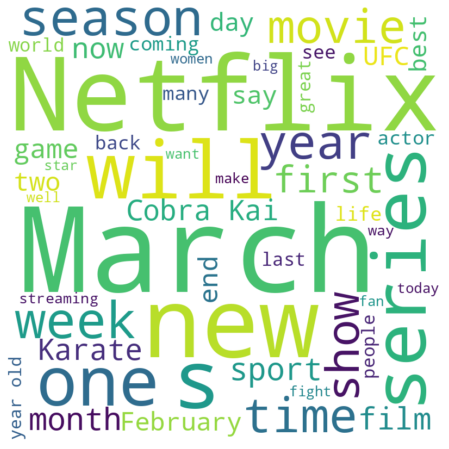

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df["merge_text"])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=STOPWORDS, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#DATAFRAME CLEANING
- Changement format de la date
- Transformation de la date en jour de la semaine
- Comptabilisation de la publication des articles par semaine

In [ ]:
# formater la colonne 'publishedAt'

df['publishedAt'] = pd.to_datetime(df['publishedAt'])

#jour_de_la_semaine = df['publishedAt'].dt.strftime("%A")

df['jourdelasemaine']=df['publishedAt'].dt.strftime("%A")
df['publishedAt'] = df['publishedAt'].dt.strftime('%d/%m/%Y')
df['publishedAt']
df['jourdelasemaine']

0      Wednesday
1      Wednesday
2      Wednesday
3      Wednesday
4      Wednesday
         ...    
437    Wednesday
438    Wednesday
439    Wednesday
440    Wednesday
441    Wednesday
Name: jourdelasemaine, Length: 442, dtype: object

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_grouped = df.resample('W', on='publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-26,79
1,2023-03-05,130
2,2023-03-12,108
3,2023-03-19,85
4,2023-03-26,40


# Analyse NETFLIX

In [ ]:
import pandas as pd

# Filtrer les articles contenant le mot "Netflix"
articles_contenant_mot = df[df['content'].str.contains('Netflix')]

# Convertir la colonne "publishedAt" en objet datetime et extraire la date
df['date'] = pd.to_datetime(df['publishedAt']).dt.date

# Regrouper les articles par date et compter le nombre d'articles par date
articles_par_date = articles_contenant_mot.groupby(df['date']).size().reset_index(name='nb_articles')

# Afficher les résultats
articles_par_date

,date,nb_articles
0,2023-01-03,8
1,2023-02-03,4
2,2023-02-22,9
3,2023-02-23,3
4,2023-02-24,1
5,2023-02-26,2
6,2023-02-27,6
7,2023-02-28,10
8,2023-03-03,4
9,2023-03-13,1


In [ ]:
articles_par_date = articles_contenant_mot.groupby(df['date']).size().reset_index(name='nb_articles')
articles_par_date

,date,nb_articles
0,2023-01-03,8
1,2023-02-03,4
2,2023-02-22,9
3,2023-02-23,3
4,2023-02-24,1
5,2023-02-26,2
6,2023-02-27,6
7,2023-02-28,10
8,2023-03-03,4
9,2023-03-13,1


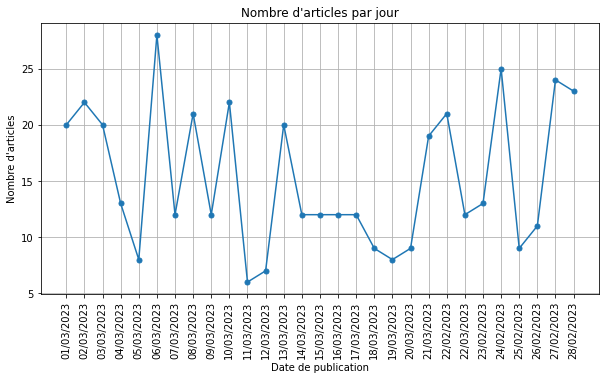

In [ ]:
# Grouper les données par jour et compter le nombre d'articles
daily_counts = df.groupby("publishedAt")["content"].count()

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', markersize=5)
plt.xlabel("Date de publication")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles par jour")
plt.grid()

plt.xticks(daily_counts.index, rotation=90)

# Afficher le graphique
plt.show()

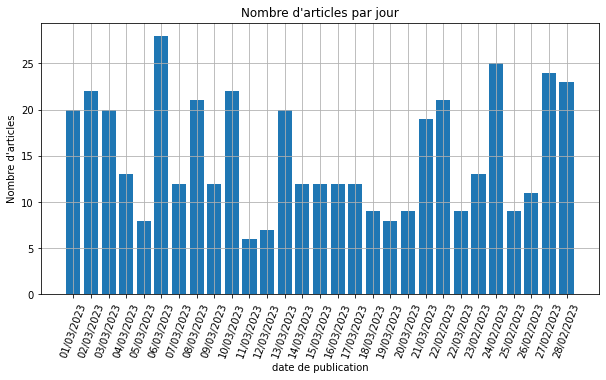

In [ ]:
# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.bar(daily_counts.index, daily_counts.values)
plt.xlabel("date de publication")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles par jour")
plt.grid()

plt.xticks(daily_counts.index, rotation=70)

# Afficher le graphique
plt.show()

In [ ]:
#diagramme par jour de la semaine

plt.figure(figsize=(10, 5))
plt.bar(jourdelasemaine.index, jourdelasemaine.values)
plt.xlabel("date de publication")
plt.ylabel("Nombre d'articles")
plt.title("Nombre d'articles par jour")
plt.grid()

plt.xticks(jourdelasemaine.index, rotation=70)

# Afficher le graphique
plt.show()


NameError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
import pandas as pd
import datetime

date_object = df['publishedAt']

day_of_week = date_object.strftime('%A')
print(day_of_week)

In [ ]:
date_counts = df['publishedAt'].value_counts()
date_counts

In [ ]:
#répertorier les dates uniques

import pandas as pd

dates_uniques = df['publishedAt'].dt.date.unique()

dates_uniques

In [ ]:
# 

import matplotlib.pyplot as plt

counts = data[df['publishedAt']].value_counts()
counts

'''names = row['dates_uniques'] # nom des barres
values = [1, 10, 100]
plt.bar(names, values) ; plt.show() # Tracer'''

In [ ]:
import matplotlib.pyplot as plt

data = [25, 40, 10, 25, 7]
labels = ['Groupe A', 'Groupe B', 'Groupe C', 'Groupe D', 'Argent']
plt.pie(data, labels=labels)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
names = ['A', 'B', 'C'] # nom des barres
values = [1, 10, 100]
plt.bar(names, values) ; plt.show() # Tracer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données du fichier CSV dans un dataframe
df =pd.read_csv("KARATE.csv")

# Calcul du total pour chaque catégorie
totals = df.groupby('Édition')['Total'].sum()

# Création du graphique camembert à partir des totaux
plt.bar(totals, labels=totals.index)

plt.show()